<a href="https://colab.research.google.com/github/Lee-Minsoo-97/Templates-for-Descrptv-Predctv_Anlyt/blob/main/Testing_Normality_(Tentative).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2, norm, chisquare
import matplotlib.pyplot as plt
def chi_square_bin_edges(num_bins, data):
    percentiles = np.linspace(0, 100, num_bins + 1)
    bin_edges = norm.ppf(percentiles / 100, loc=np.mean(data), scale=np.std(data, ddof = 1))
    return bin_edges

In [ ]:
sig = 0.05
data = pd.read_excel('Testing Normality.xlsx', sheet_name = None)

In [ ]:
data.keys()

dict_keys(['Data', '_PalUtilTempWorksheet', '_STDS_DGAF604FA', 'Chi-Sq Test', 'Chi-Sq Test (2)', 'Lilliefors Test', 'Q-Q Plot'])

In [ ]:
df =  data['Data']

In [ ]:
df

,Part,Width
0,1,9.990
1,2,10.031
2,3,9.985
3,4,9.983
4,5,10.004
...,...,...
85,86,9.977
86,87,10.004
87,88,10.007
88,89,10.003


In [ ]:
num_bins = 8
observed_freq, bin_edges = np.histogram(df['Width'], bins=chi_square_bin_edges(num_bins,df['Width']))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate expected frequencies based on the normal distribution
mu = round(np.mean(df['Width']),6)
std = np.std(df['Width'],ddof = 1)
expected_freq = []
for i in range(len(bin_edges)-1):
    if i == 0:
        expected_freq.append(len(df['Width']) * (norm.cdf(bin_edges[i+1], loc = mu, scale = std ) - 0))
    elif i == len(bin_edges)-1:
        expected_freq.append(len(df['Width']) * (1 - norm.cdf(bin_edges[i], loc = mu, scale = std)))
    else:
        expected_freq.append(len(df['Width']) * (norm.cdf(bin_edges[i+1], loc = mu, scale = std ) - norm.cdf(bin_edges[i], loc = mu, scale = std)))

# # Step 3: Perform the Chi-Square Test
chi_statistic = np.sum((observed_freq - np.array(expected_freq))**2/np.array(expected_freq))
pval = 1 - chi2.cdf(chi_statistic, df=num_bins-3)
# # Step 4: Interpret Results
print(f"Chi-Square Statistic: {chi_statistic}")
print(f"P-Value: {pval}")

if pval > sig:
    print("The data follows a normal distribution (fail to reject the null hypothesis).")
else:
    print("The data does not follow a normal distribution (reject the null hypothesis).")

Chi-Square Statistic: 6.177801224825118
P-Value: 0.2893005852413477
The data follows a normal distribution (fail to reject the null hypothesis).


In [ ]:
# np.array([       -np.inf, 9.983000,  9.988167,  9.993333 ,  9.998500,
#        10.003667, 10.008833, 10.01400,         np.inf])
#note: the result is very sensitive on the construction of bins

In [ ]:
normaltest(df['Width'])

NormaltestResult(statistic=3.0275629294294992, pvalue=0.22007619213198976)

In [ ]:
import statsmodels.api as sm
Lilliefors_statistic,Lilliefors_p_value=sm.stats.diagnostic.lilliefors(df['Width'],dist = 'norm')
Lilliefors_statistic,Lilliefors_p_value

(0.05134523411613179, 0.8358213315196279)

In [ ]:
standardized_data = (df['Width'] - mu)/std

sorted_data = np.sort(standardized_data)

n = len(sorted_data)
ecdf = np.arange(1, n + 1) / n

theoretical_cdf = norm.cdf(sorted_data)
D = np.max(np.abs(ecdf - theoretical_cdf))

critical_value = 0.886 / np.sqrt(n)
reject_null = D > critical_value
reject_null

False

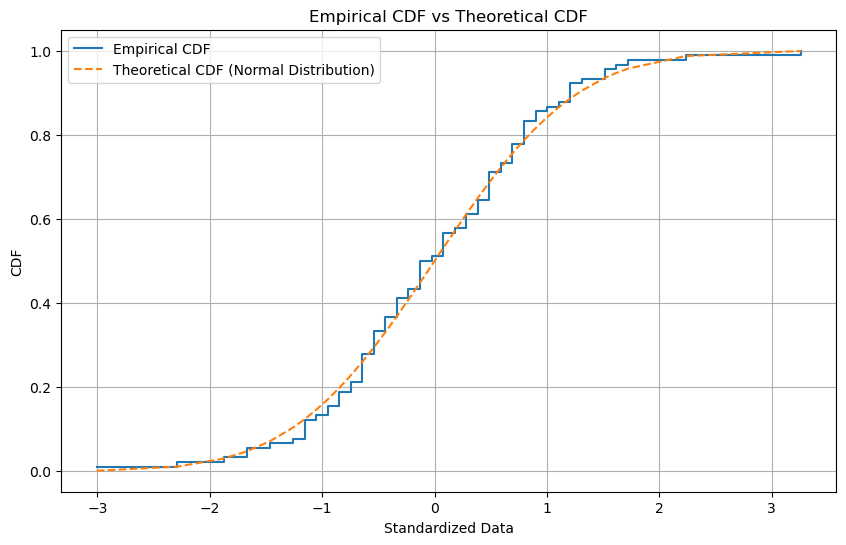

In [ ]:
plt.figure(figsize=(10, 6))
plt.step(sorted_data, ecdf, label='Empirical CDF', where='post')
plt.plot(sorted_data, theoretical_cdf, label='Theoretical CDF (Normal Distribution)', linestyle='--')

# Adding labels and title
plt.xlabel('Standardized Data')
plt.ylabel('CDF')
plt.title('Empirical CDF vs Theoretical CDF')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

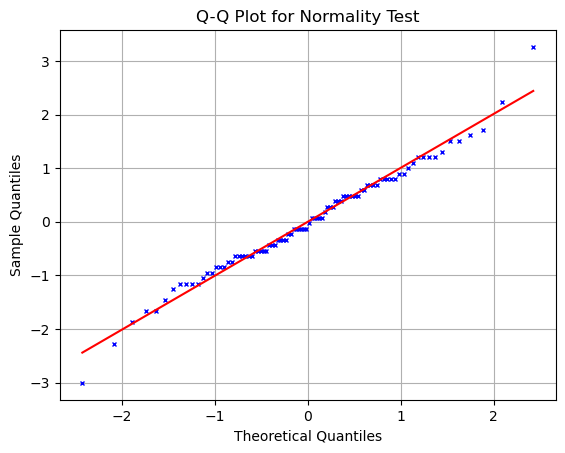

In [ ]:
#Q-Q plot
import scipy.stats as stats
stats.probplot(standardized_data,dist="norm", plot=plt)
plt.gca().get_lines()[0].set_marker('x')  # Set marker shape to 'o'
plt.gca().get_lines()[0].set_markersize(3)  # Set marker size
# Adding labels and title
plt.title("Q-Q Plot for Normality Test")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Display the plot
plt.grid(True)
plt.show()